In [7]:
import pandas as pd

In [13]:
data = pd.read_csv('Demographic_Data.csv')

In [14]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [15]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


In [19]:
data=data.drop_duplicates()

In [20]:
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [21]:
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [24]:
#define bins
bins=[18,35,65,85]
#name of group 1=18-34, 2=35-64 3=65+
group_names=[1,2,3]

data['age range']= pd.cut(data['age'],bins,labels = group_names)
data

,in-store,age,items,amount,region,age range
0,0,37,4,281.03,2,2
1,0,35,2,219.51,2,1
2,1,45,3,1525.70,4,2
3,1,46,3,715.25,3,2
4,1,33,4,1937.50,1,1
...,...,...,...,...,...,...
79995,1,71,3,558.82,1,3
79996,0,59,7,1932.00,3,2
79997,0,54,1,414.16,2,2
79998,1,49,4,335.32,1,2


In [25]:
#define bins
bins=[0,500,1000,1500,2000,2500,3000]
#name of group 1=0-500, 2=500-1000,3=1000-1500,4=1500-2000, 5=2000-2500,6=2500-3000
group_names=[1,2,3,4,5,6]

data['amount spent']= pd.cut(data['amount'],bins,labels = group_names)
data

,in-store,age,items,amount,region,age range,amount spent
0,0,37,4,281.03,2,2,1
1,0,35,2,219.51,2,1,1
2,1,45,3,1525.70,4,2,4
3,1,46,3,715.25,3,2,2
4,1,33,4,1937.50,1,1,4
...,...,...,...,...,...,...,...
79995,1,71,3,558.82,1,3,2
79996,0,59,7,1932.00,3,2,4
79997,0,54,1,414.16,2,2,1
79998,1,49,4,335.32,1,2,1


In [26]:
import matplotlib.pyplot as plt

In [27]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region', 'age range',
       'amount spent'],
      dtype='object')


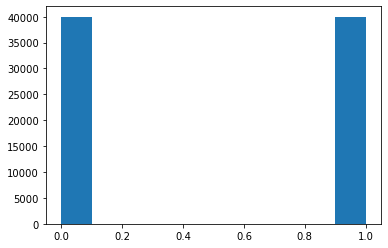

In [29]:
plt.hist(data['in-store'])
plt.show()

In [35]:
#Average Spent per transaction by region
data.groupby('region').amount.mean()

region
1     744.990939
2     252.097741
3     917.969637
4    1283.938357
Name: amount, dtype: float64

In [36]:
#median transaction by region
data.groupby('region').amount.median()

region
1     662.860
2     250.205
3     697.825
4    1230.250
Name: amount, dtype: float64

In [37]:
corr_mat = data.corr()
print(corr_mat)

          in-store       age     items    amount    region
in-store  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age      -0.178180  1.000000  0.000657 -0.282033 -0.235370
items    -0.003897  0.000657  1.000000  0.000384 -0.001904
amount   -0.085573 -0.282033  0.000384  1.000000  0.403486
region   -0.133171 -0.235370 -0.001904  0.403486  1.000000


In [38]:
cov_mat = data.cov()
print(cov_mat)

           in-store          age     items         amount      region
in-store   0.250003    -1.400071 -0.004017     -30.860425   -0.075019
age       -1.400071   246.966189  0.021270   -3196.782841   -4.167305
items     -0.004017     0.021270  4.248751       0.570791   -0.004421
amount   -30.860425 -3196.782841  0.570791  520221.252295  327.874873
region    -0.075019    -4.167305 -0.004421     327.874873    1.269321


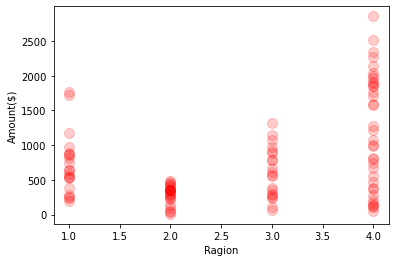

In [54]:
data_sample = data.sample(100)
x = data_sample['region']
y = data_sample['amount']
plt.scatter(x,y, marker='o', color='red', s=100, alpha=1/5)
plt.xlabel("Ragion")
plt.ylabel("Amount($)")
plt.show()
